In [1]:
import os
import glob as gb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.utils as image
from sklearn.cluster import KMeans
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns

In [2]:
DATASET_PATH = "V4.dataset-skin-deasease-capstone"

os.listdir(DATASET_PATH)

['1train',
 '2validation',
 '3test',
 'clean-dataset-train',
 'clean-dataset-validation',
 'dataset1',
 'dataset2']

In [3]:
TRAIN_DIR = os.path.join(DATASET_PATH, '1train')
VAL_DIR = os.path.join(DATASET_PATH, '2validation')

In [4]:
def img_count_in_folder(FOLDER_PATH):  
    print('-'*70)
    for folder in os.listdir(FOLDER_PATH):
        files=gb.glob(pathname=str(FOLDER_PATH + '/' + folder + '/*.jpg'))
        print(f'{len(files):4} gambar yang ditemukan di dalam folder {folder}')
    print('-'*70)

In [5]:
print("TRAIN DIR")
img_count_in_folder(TRAIN_DIR)
print("VAL_DIR")
img_count_in_folder(VAL_DIR)

TRAIN DIR
----------------------------------------------------------------------
 332 gambar yang ditemukan di dalam folder Acne Vulgaris
 370 gambar yang ditemukan di dalam folder Actinic Keratosis
 551 gambar yang ditemukan di dalam folder Nail Fungus
 580 gambar yang ditemukan di dalam folder Psoriasis
 357 gambar yang ditemukan di dalam folder Seborrheic Keratoses
----------------------------------------------------------------------
VAL_DIR
----------------------------------------------------------------------
  90 gambar yang ditemukan di dalam folder Acne Vulgaris
  93 gambar yang ditemukan di dalam folder Actinic Keratosis
 138 gambar yang ditemukan di dalam folder Nail Fungus
 146 gambar yang ditemukan di dalam folder Psoriasis
  90 gambar yang ditemukan di dalam folder Seborrheic Keratoses
----------------------------------------------------------------------


In [6]:
def show_images(img_files):
    plt.figure()
    fig = plt.figure(figsize=(10, 10))
    fig.patch.set_facecolor('xkcd:gray')
    
    for i in range(len(img_files)):
        plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
        img=mpimg.imread(img_files[i])
        plt.imshow(img)
        plt.tight_layout()
        plt.axis('off')
        plt.title(img_files[i].split('\\')[2]) 
    
    plt.show()

In [7]:
def list_files(dir):
    arr=[]
    for root,dirs, files in os.walk(dir):
        for name in files:
            if name.endswith('.jpg'):
                arr.append(os.path.join(root, name))
                break
    return arr

<Figure size 640x480 with 0 Axes>

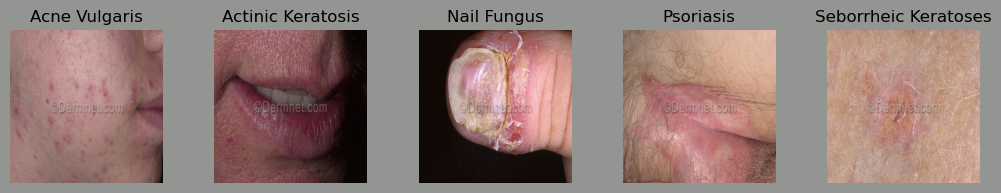

<Figure size 640x480 with 0 Axes>

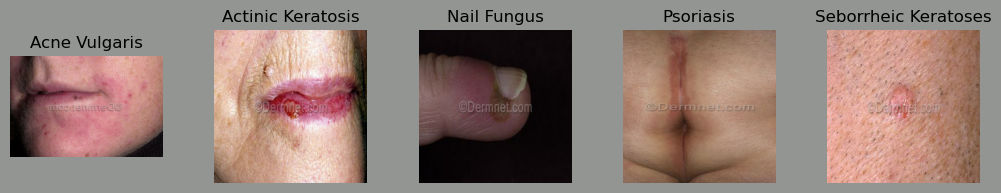

In [8]:
img_list1= list_files(TRAIN_DIR)
show_images(img_list1)

img_list2= list_files(VAL_DIR)
show_images(img_list2)

[[[0.0627451  0.03137255 0.01960784]
  [0.0627451  0.03137255 0.01960784]
  [0.0627451  0.03137255 0.01960784]
  ...
  [0.25882354 0.11372549 0.07843138]
  [0.25882354 0.11372549 0.07843138]
  [0.2627451  0.11764706 0.08235294]]

 [[0.0627451  0.03137255 0.01960784]
  [0.0627451  0.03137255 0.01960784]
  [0.0627451  0.03137255 0.01960784]
  ...
  [0.28627452 0.13725491 0.09411765]
  [0.28627452 0.13725491 0.09411765]
  [0.28627452 0.13725491 0.09411765]]

 [[0.0627451  0.03137255 0.01960784]
  [0.0627451  0.03137255 0.01960784]
  [0.0627451  0.03137255 0.01960784]
  ...
  [0.30588236 0.15686275 0.11372549]
  [0.30588236 0.15686275 0.11372549]
  [0.30588236 0.15686275 0.11372549]]

 ...

 [[0.0627451  0.03137255 0.02352941]
  [0.07450981 0.04313726 0.03529412]
  [0.07058824 0.03921569 0.03137255]
  ...
  [0.39607844 0.28235295 0.25882354]
  [0.4117647  0.2901961  0.27058825]
  [0.43137255 0.31764707 0.28627452]]

 [[0.05882353 0.02745098 0.01960784]
  [0.07058824 0.03921569 0.03137255]


(-0.5, 223.5, 223.5, -0.5)

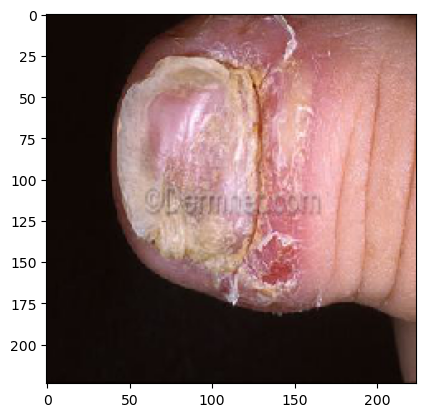

In [9]:
img = image.load_img(
    img_list1[2],
    target_size=(224, 224))

x = image.img_to_array(img)/255

print(x)
plt.imshow(x)
plt.axis(True)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-0.5, 223.5, 223.5, -0.5)

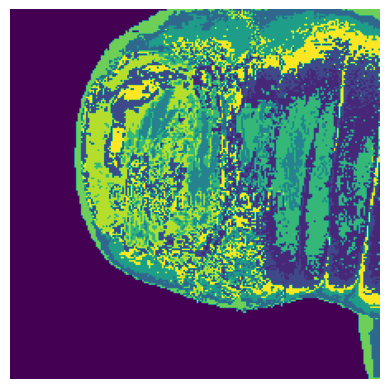

In [10]:
img = image.load_img(
    img_list1[2],
    target_size=(224, 224))

x = image.img_to_array(img)/255
kmeans = KMeans(10)
kmeans.fit(x.reshape(-1, 3))
x_segment = kmeans.predict(x.reshape(-1, 3)).reshape(x.shape[0], x.shape[1])

plt.imshow(x_segment)
plt.axis(False)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-0.5, 223.5, 223.5, -0.5)

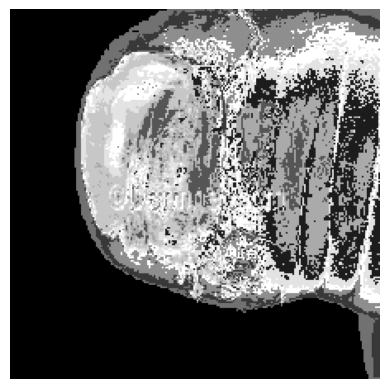

In [11]:
img = image.load_img(
    img_list1[2],
    target_size=(224, 224))

x = image.img_to_array(img)/255
kmeans = KMeans(10)
kmeans.fit(x.reshape(-1, 3))
x_segment = kmeans.predict(x.reshape(-1, 3)).reshape(x.shape[0], x.shape[1])

plt.imshow(x_segment,'gray')
plt.axis(False)

In [12]:
x = image.img_to_array(img)/255
img = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))

pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(50176, 3)


In [13]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
criteria

(3, 100, 0.2)

In [14]:
k=4

_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
print(_)

504.85352075183437


<function matplotlib.pyplot.show(close=None, block=None)>

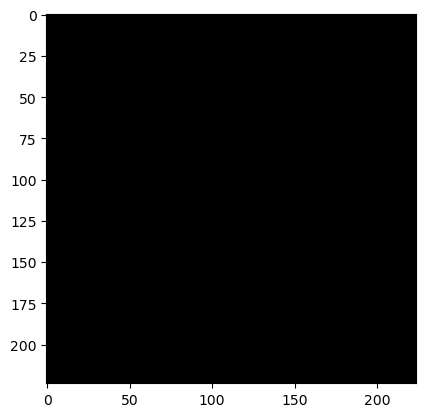

In [15]:
centers=np.uint8(centers)
labels = labels.flatten()

segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)
plt.imshow(segmented_img)
plt.show

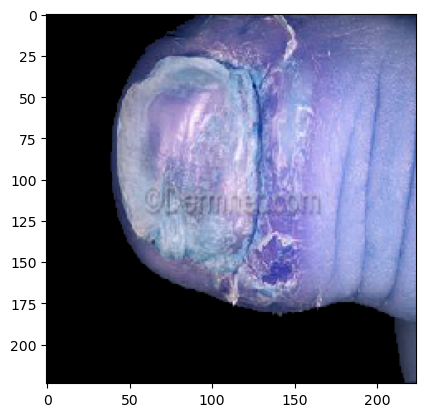

In [16]:
masked_img =  np.copy(img)
masked_img = masked_img.reshape((-1, 3))
cluster = 2
masked_img[labels==cluster] = [0, 0, 0]
masked_img = masked_img.reshape(img.shape)

plt.imshow(masked_img)
plt.show()

In [17]:
def img_segmentation(img, k=4):
    pixel_values = img.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers=np.uint8(centers)
    labels = labels.flatten()
    segmented_img = centers[labels.flatten()]
    segmented_img = segmented_img.reshape(img.shape)
    masked_img =  np.copy(img)
    masked_img = masked_img.reshape((-1, 3))
    cluster = 2
    masked_img[labels==cluster] = [0, 0, 0]
    masked_img = masked_img.reshape(img.shape)

    return masked_img

In [18]:
# Datagen for validation set dan training set
datagen = ImageDataGenerator(#preprocessing_function=img_segmentation,
                             rescale = 1./255,
                             rotation_range = 40,
                             zoom_range = 0.2,
                             width_shift_range=0.2, 
                             shear_range= 0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             vertical_flip= True,
                             fill_mode='nearest',
                             )

# ImageDataGenerator for test set
val_datagen = ImageDataGenerator(#preprocessing_function=img_segmentation,
                                 rescale=1./255)

In [19]:
IMG_SIZE = (224, 224)

# Create train dataset
train_set = datagen.flow_from_directory(TRAIN_DIR, 
                                        batch_size= 64,
                                        target_size=IMG_SIZE)

val_set = val_datagen.flow_from_directory(VAL_DIR, 
                                           #class_mode='categorical', 
                                           batch_size= 64,
                                           target_size=IMG_SIZE)

Found 2190 images belonging to 5 classes.
Found 557 images belonging to 5 classes.


In [20]:
# # Create variabel X_train and y_train
X_train, y_train = train_set.next()

# Create variabel X_val and y_val
X_val, y_val = val_set.next()

In [21]:
X_train.shape

(64, 224, 224, 3)

In [22]:
class_dict = {v : k for k, v in train_set.class_indices.items()}

def plot_augmented_imgs(X, y):
    labels=[]
    y_label = np.argmax(y, axis=1)
    
    for label in y_label:
        labels.append(class_dict[label])

    for idx in range(0,10):
        plt.figure(figsize=(5, 5))
        plt.imshow(X[idx])
        plt.title(labels[idx])

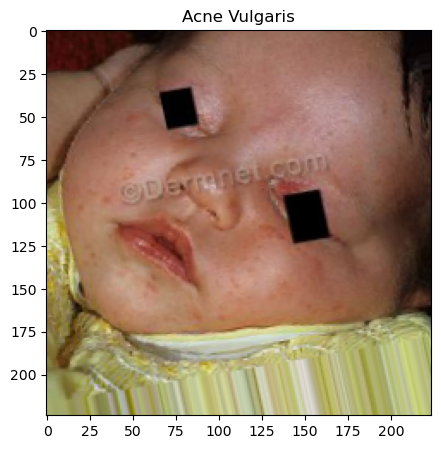

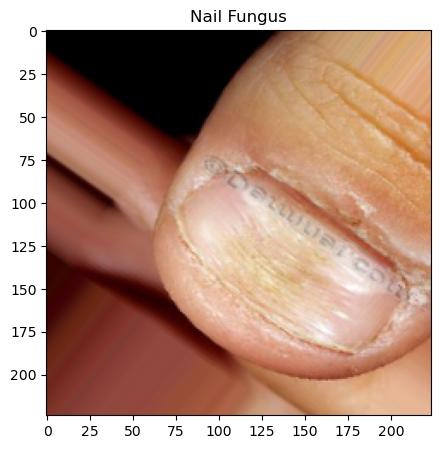

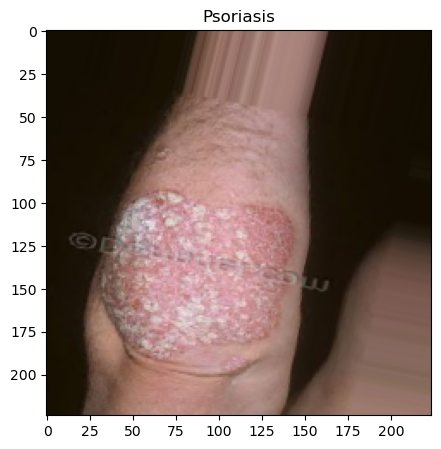

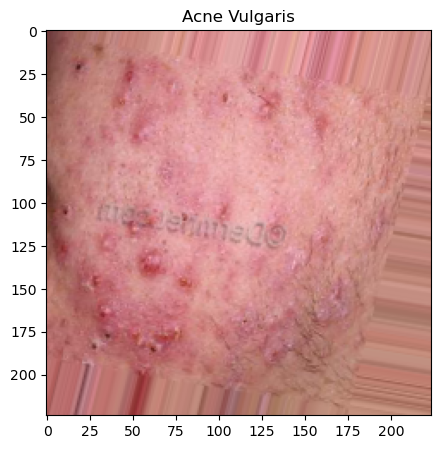

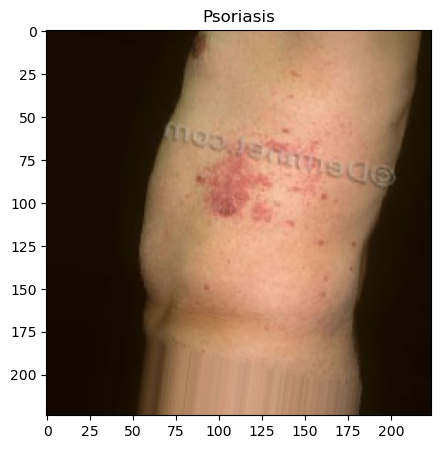

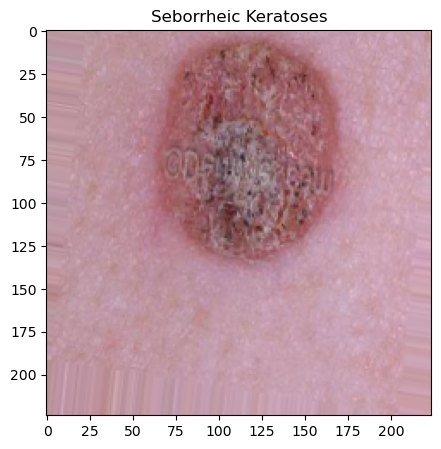

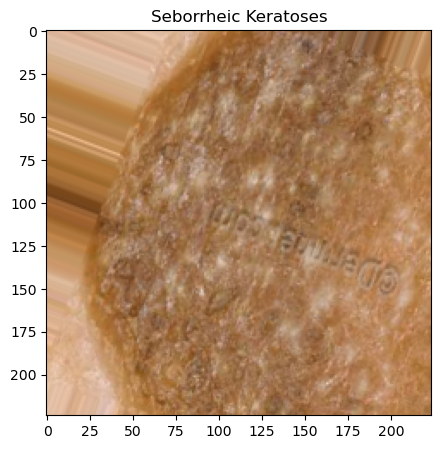

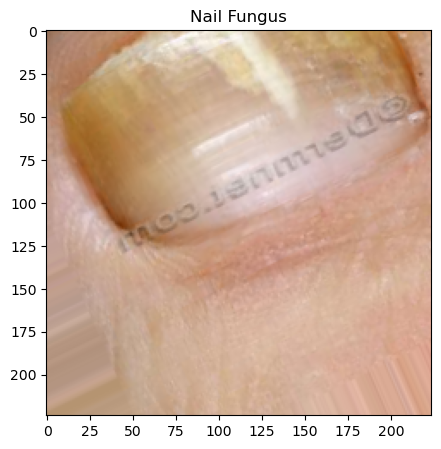

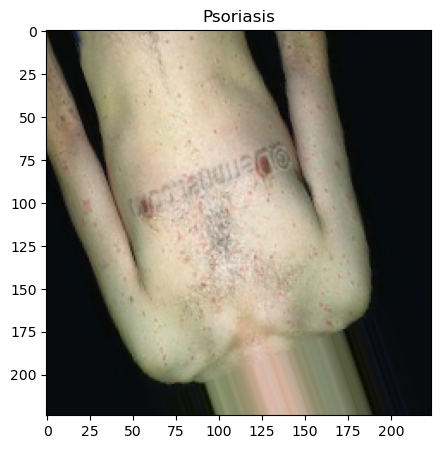

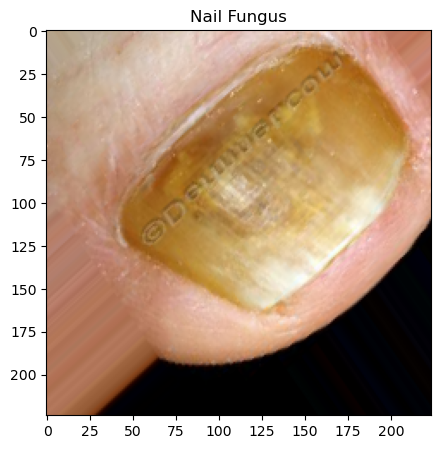

In [23]:
plot_augmented_imgs(X_train, y_train)

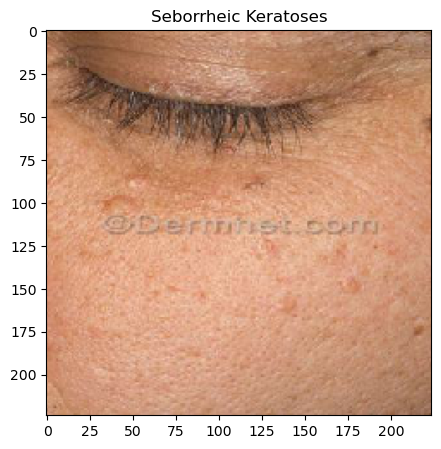

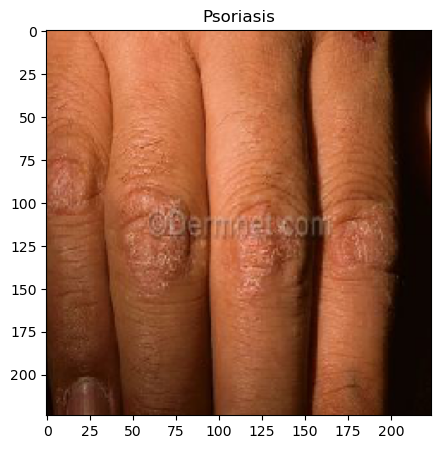

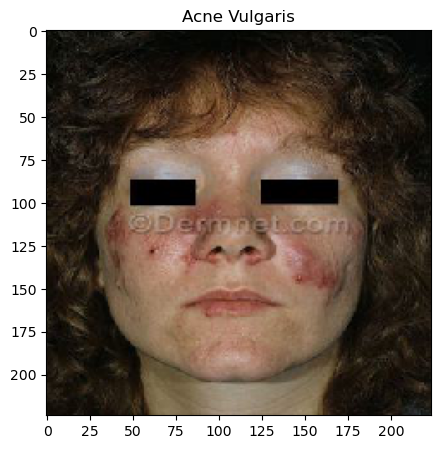

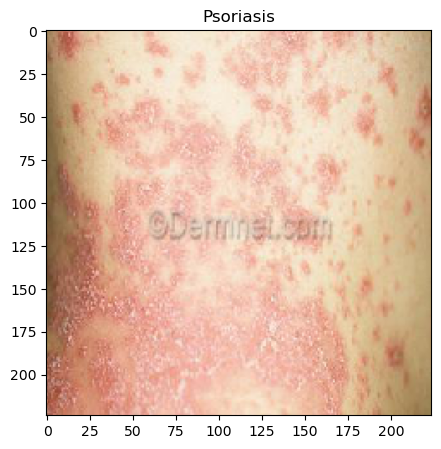

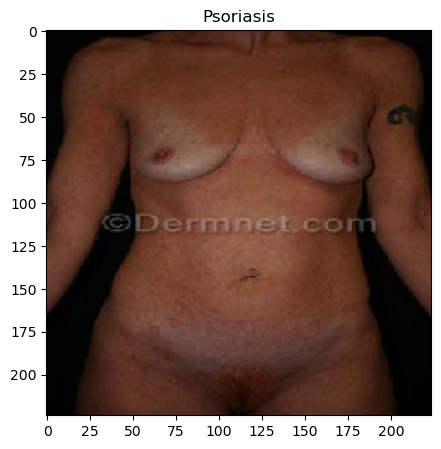

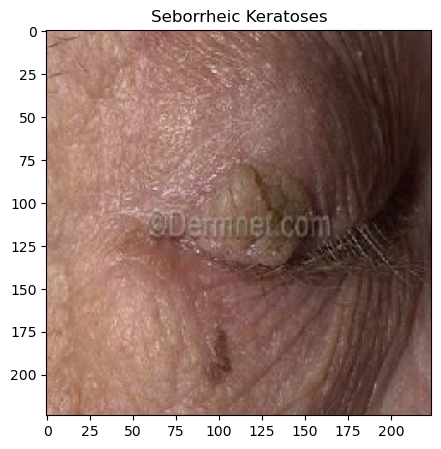

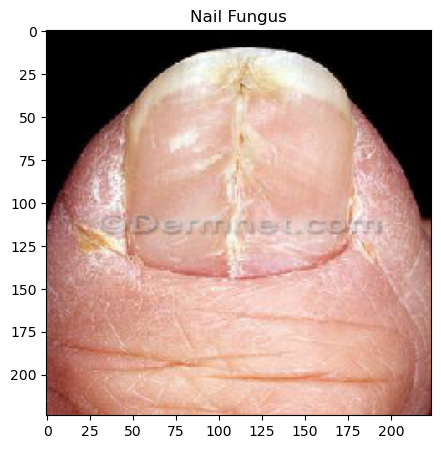

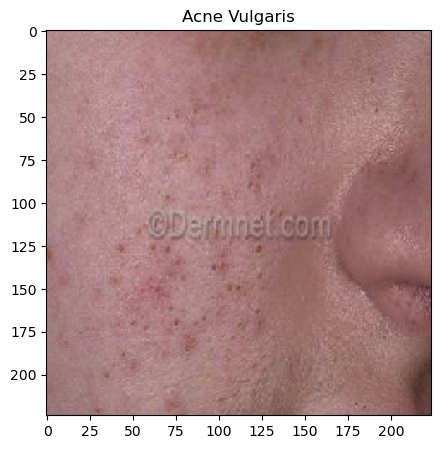

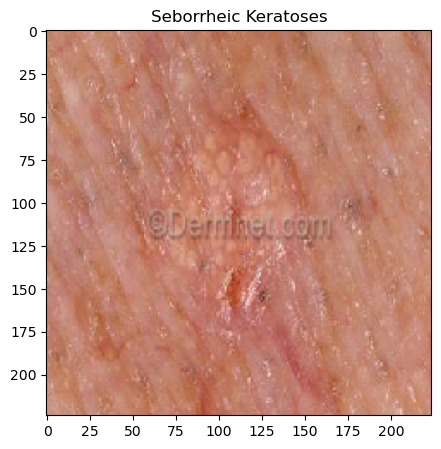

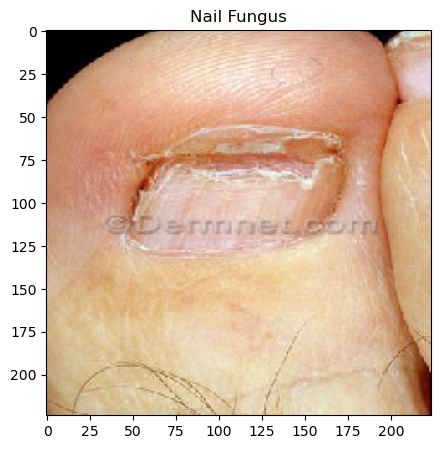

In [24]:
plot_augmented_imgs(X_val, y_val)

In [25]:
train_set.class_indices

{'Acne Vulgaris': 0,
 'Actinic Keratosis': 1,
 'Nail Fungus': 2,
 'Psoriasis': 3,
 'Seborrheic Keratoses': 4}

In [26]:
def evaluate_model(model, X, y):
    print('Loss of the model is - ', model.evaluate(X, y)[0])
    print('Accuracy of the model is - ', model.evaluate(X, y)[1]*100, '%')
    predict = model.predict(X)
  # print(predict)
    predict = np.argmax(predict, axis=1)
    predict = predict.reshape(1, -1)[0]
    y_label = np.argmax(y, axis=1)
    print(classification_report(y_label, predict, target_names =['Acne Vulgaris', 'Actinic Keratosis', 'Nail Fungus', 
                                                                'Psoriasis', 'Seborrheic Keratoses']))

    conf_matrix = confusion_matrix(y_label, predict)
  # print(conf_matrix)
    df_cm = pd.DataFrame(conf_matrix, index = [i for i in ('Acne Vulgaris', 'Actinic Keratosis', 'Nail Fungus', 
                                                                'Psoriasis', 'Seborrheic Keratoses')],
                         columns = [i for i in ('Acne Vulgaris', 'Actinic Keratosis', 'Nail Fungus', 
                                                                'Psoriasis', 'Seborrheic Keratoses')])
    plt.figure(figsize = (3, 3))
    sns.heatmap(df_cm, annot=True)

plt.style.use('seaborn-whitegrid')

def plot_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))
    plt.subplot(1, 2, 1)
    acc_plot, = plt.plot(epochs, acc, 'orange')
    val_acc_plot, = plt.plot(epochs, val_acc, 'blue')
    plt.title('Training and Validation Accuracy')
    plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])


def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.subplot(1, 2, 2)
    loss_plot, = plt.plot(epochs, loss, 'orange')
    val_loss_plot, = plt.plot(epochs, val_loss, 'blue')
    plt.title('Training and Validation Loss')
    plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_hist(history):
    plt.figure(figsize=(15,5))
    plot_acc(history)
    plot_loss(history)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10780\966126161.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [27]:
Classifier_Model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

IMAGE_SIZE = (224, 224)

feature_extractor = hub.KerasLayer(Classifier_Model, input_shape=IMAGE_SIZE + (3,))

model = tf.keras.models.Sequential([
    feature_extractor,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 2,916,421
Trainable params: 658,437
Non-trainable params: 2,257,984
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [29]:
# Retrain the model with 100 epochs
hist = model.fit(train_set, epochs=75, validation_data = val_set)

Epoch 1/75
35/35 [==============================] - 89s 2s/step - loss: 1.0538 - accuracy: 0.6489 - val_loss: 0.5629 - val_accuracy: 0.7810
Epoch 2/75
35/35 [==============================] - 74s 2s/step - loss: 0.5576 - accuracy: 0.7977 - val_loss: 0.4513 - val_accuracy: 0.8241
Epoch 3/75
35/35 [==============================] - 76s 2s/step - loss: 0.5001 - accuracy: 0.8110 - val_loss: 0.4482 - val_accuracy: 0.8061
Epoch 4/75
35/35 [==============================] - 77s 2s/step - loss: 0.4675 - accuracy: 0.8297 - val_loss: 0.4247 - val_accuracy: 0.8456
Epoch 5/75
35/35 [==============================] - 79s 2s/step - loss: 0.4194 - accuracy: 0.8466 - val_loss: 0.4424 - val_accuracy: 0.8294
Epoch 6/75
35/35 [==============================] - 78s 2s/step - loss: 0.4010 - accuracy: 0.8525 - val_loss: 0.3915 - val_accuracy: 0.8492
Epoch 7/75
35/35 [==============================] - 79s 2s/step - loss: 0.3830 - accuracy: 0.8493 - val_loss: 0.3951 - val_accuracy: 0.8546
Epoch 8/75
35/35 [==

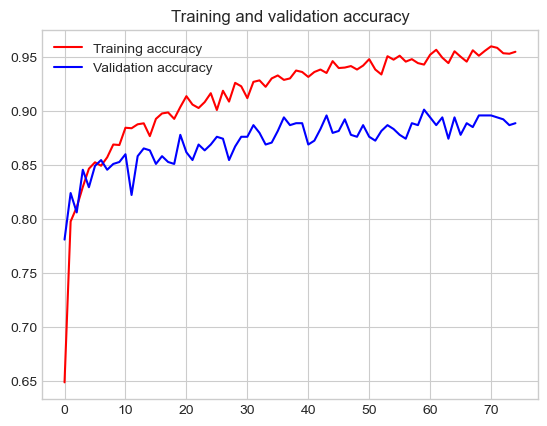

<Figure size 640x480 with 0 Axes>

In [30]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

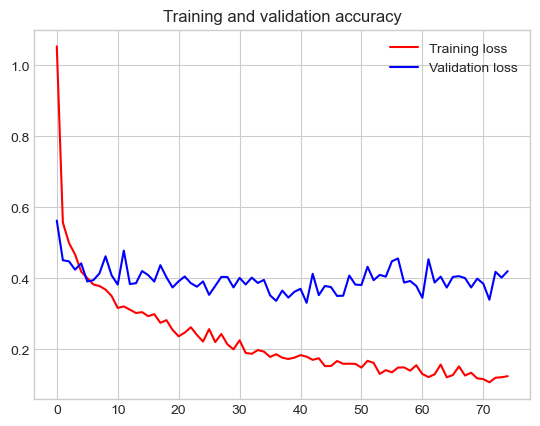

<Figure size 640x480 with 0 Axes>

In [31]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [32]:
loss, accuracy = model.evaluate(val_set, verbose=0)
print(f"Model Loss is {loss:.2f} and Accuracy is {100*np.round(accuracy, 4)}%")

Model Loss is 0.42 and Accuracy is 88.87%


2/2 [==============================] - 2s 1s/step - loss: 0.6217 - accuracy: 0.9062
Loss of the model is -  0.6216832399368286
2/2 [==============================] - 2s 1s/step - loss: 0.6217 - accuracy: 0.9062
Accuracy of the model is -  90.625 %
2/2 [==============================] - 3s 1s/step
                      precision    recall  f1-score   support

       Acne Vulgaris       0.73      0.89      0.80         9
   Actinic Keratosis       0.83      0.83      0.83         6
         Nail Fungus       1.00      0.90      0.95        21
           Psoriasis       0.88      0.93      0.90        15
Seborrheic Keratoses       1.00      0.92      0.96        13

            accuracy                           0.91        64
           macro avg       0.89      0.90      0.89        64
        weighted avg       0.92      0.91      0.91        64



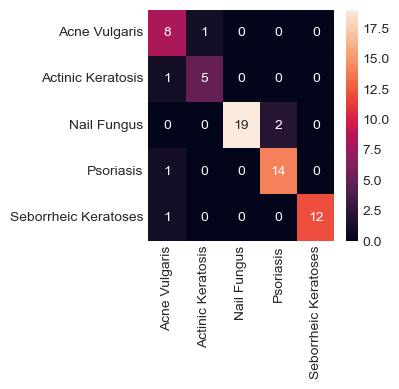

In [33]:
evaluate_model(model, X_val, y_val)

In [36]:
# # CODE BLOCK FOR OLDER VERSIONS OF SAFARI

import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

images = os.listdir("./tmp2/images")

print(images)

label = ['Acne Vulgaris', 'Actinic Keratosis', 'Nail Fungus', 'Psoriasis', 'Seborrheic Keratoses']

for i in images:
    print()
# predicting images
    path = './tmp2/images/' + i
    img = load_img(path, target_size=(224, 224))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(path)
    
    predict = np.argmax(classes, axis=1)

    print(classes)
    data = {
        'Prediction' : label[predict[0]]}
    print(data)

['acne3.jpg', 'acne4.webp', 'actinic2.jpg', 'actinic3.jpg', 'nail.jpg', 'nail1.jpg', 'Psoriasis.jpg', 'Psoriasis1.jpg', 'seborrheic.jpg', 'seborrheic2.jpg']

1/1 [==============================] - 0s 90ms/step
./tmp2/images/acne3.jpg
[[9.9999845e-01 2.1298604e-07 3.6981429e-12 1.1695524e-06 6.1713394e-08]]
{'Prediction': 'Acne Vulgaris'}

1/1 [==============================] - 0s 83ms/step
./tmp2/images/acne4.webp
[[9.99511480e-01 2.75379221e-04 2.80290215e-06 1.09273489e-04
  1.01054706e-04]]
{'Prediction': 'Acne Vulgaris'}

1/1 [==============================] - 0s 82ms/step
./tmp2/images/actinic2.jpg
[[1.7954561e-08 5.8348056e-02 9.6522446e-10 9.4149995e-01 1.5209905e-04]]
{'Prediction': 'Psoriasis'}

1/1 [==============================] - 0s 101ms/step
./tmp2/images/actinic3.jpg
[[8.7809822e-06 9.9998772e-01 8.1978877e-09 6.1496502e-07 2.8425634e-06]]
{'Prediction': 'Actinic Keratosis'}

1/1 [==============================] - 0s 83ms/step
./tmp2/images/nail.jpg
[[4.2236970e-17 3.81

In [35]:
model_detection = 'ModelingFinalV2.h5'

model.save(model_detection, save_format="h5")

In [64]:
my_model = tf.keras.models.load_model(
    ('ModelingV5.h5'), custom_objects={'KerasLayer':hub.KerasLayer}
)

In [65]:
loss, accuracy = my_model.evaluate(val_set, verbose=0)
print(f"Model Loss is {loss:.2f} and Accuracy is {100*np.round(accuracy, 4)}%")

Model Loss is 0.39 and Accuracy is 84.92%


2/2 [==============================] - 2s 1s/step - loss: 0.4910 - accuracy: 0.8125
Loss of the model is -  0.49096107482910156
2/2 [==============================] - 2s 1s/step - loss: 0.4910 - accuracy: 0.8125
Accuracy of the model is -  81.25 %
2/2 [==============================] - 3s 1s/step
                      precision    recall  f1-score   support

       Acne Vulgaris       0.81      0.93      0.87        14
   Actinic Keratosis       0.73      0.57      0.64        14
         Nail Fungus       1.00      1.00      1.00        15
           Psoriasis       0.71      0.92      0.80        13
Seborrheic Keratoses       0.80      0.50      0.62         8

            accuracy                           0.81        64
           macro avg       0.81      0.78      0.78        64
        weighted avg       0.81      0.81      0.80        64



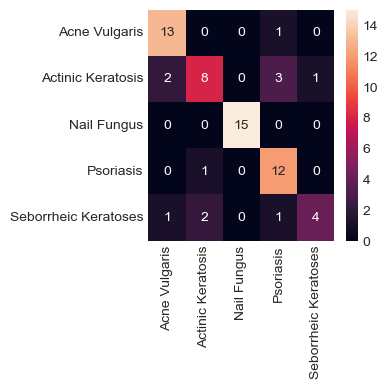

In [60]:
evaluate_model(my_model, X_val, y_val)

In [63]:
# # CODE BLOCK FOR OLDER VERSIONS OF SAFARI

import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

images = os.listdir("./tmp2/images")

print(images)

label = ['Acne Vulgaris', 'Actinic Keratosis', 'Nail Fungus', 'Psoriasis', 'Seborrheic Keratoses']

for i in images:
    print()
# predicting images
    path = './tmp2/images/' + i
    img = load_img(path, target_size=(224, 224))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = my_model.predict(images, batch_size=10)
    print(path)
    
    predict = np.argmax(classes, axis=1)

    print(classes)
    data = {
        'Prediction' : label[predict[0]]}
    print(data)

['acne3.jpg', 'acne4.webp', 'actinic3.jpg', 'nail.jpg', 'nail1.jpg', 'Psoriasis.jpg', 'Psoriasis1.jpg', 'seborrheic.jpg', 'seborrheic2.jpg']

1/1 [==============================] - 0s 71ms/step
./tmp2/images/acne3.jpg
[[9.9729782e-01 9.6634682e-04 1.0816514e-06 1.6706948e-03 6.4133841e-05]]
{'Prediction': 'Acne Vulgaris'}

1/1 [==============================] - 0s 46ms/step
./tmp2/images/acne4.webp
[[8.74532163e-01 1.03031754e-01 8.67700845e-04 2.06828099e-02
  8.85546498e-04]]
{'Prediction': 'Acne Vulgaris'}

1/1 [==============================] - 0s 46ms/step
./tmp2/images/actinic3.jpg
[[0.07089716 0.7172761  0.01027302 0.19522968 0.00632412]]
{'Prediction': 'Actinic Keratosis'}

1/1 [==============================] - 0s 51ms/step
./tmp2/images/nail.jpg
[[4.5588685e-08 3.2347730e-06 9.9951768e-01 4.4389250e-04 3.5151676e-05]]
{'Prediction': 'Nail Fungus'}

1/1 [==============================] - 0s 47ms/step
./tmp2/images/nail1.jpg
[[7.0234068e-04 3.3621344e-04 8.1381202e-01 1.6982013

In [ ]:
my_model = tf.keras.models.load_model(
    ('ModelingFinalV2.h5'), custom_objects={'KerasLayer':hub.KerasLayer}
)

In [ ]:
export_dir = 'model_convert/tflite'

tf.saved_model.save(my_model, export_dir)

In [ ]:
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

converter.optimizations = [optimization]

tflite_model = converter.convert()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(my_model)
tflite_model = converter.convert()

In [ ]:
with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)